### Pre-processing Data

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set theme
sns.set_style('darkgrid', {
    'grid.linestyle': ':',
    'grid.linewidth': 1.0})

plt.style.use('dark_background')

# Set version number of neural network
nn_vers = 3

In [3]:
#  Import and read the charity_data.csv
application_df = pd.read_csv("Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID column 'EIN'
application_df.drop(columns=['EIN'], inplace=True)

In [5]:
# Determine the number of unique values in each column
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Examine columns with few degrees of freedom to determine variability
print(application_df['STATUS'].value_counts(), '\n')
print(application_df['SPECIAL_CONSIDERATIONS'].value_counts())

1    34294
0        5
Name: STATUS, dtype: int64 

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64


In [7]:
# Drop columns with low variability
application_df.drop(columns=['SPECIAL_CONSIDERATIONS', 'STATUS'],
    inplace=True)

In [8]:
# Store list of columns with more than 10 unique values
unique_cols = list(application_df.columns[(application_df.nunique() > 10)])
unique_cols

['NAME', 'APPLICATION_TYPE', 'CLASSIFICATION', 'ASK_AMT']

In [9]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

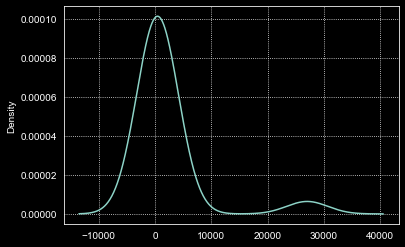

In [10]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

<AxesSubplot:ylabel='Density'>

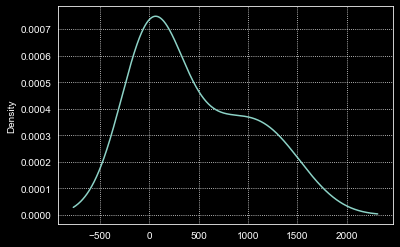

In [11]:
# Remove outlier to examine graph at higher resolution
app_counts[1:].plot.density()

In [12]:
# Store list of applications to replace (if type occurs less than 500 times)
replace_application = list(app_counts[app_counts < 500].index)

# Replace in DataFrame
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts[:15]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

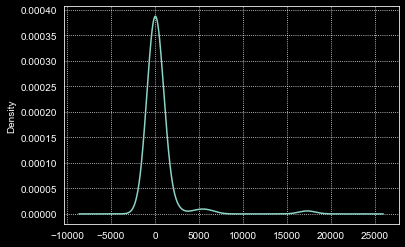

In [14]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

<AxesSubplot:ylabel='Density'>

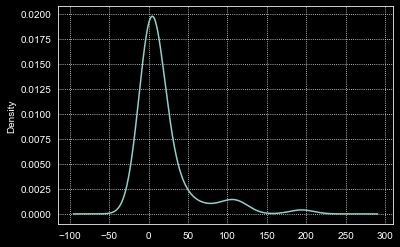

In [15]:
# Remove outliers to examine graph at higher resolution
class_counts[7:].plot.density()

In [16]:
# Store list of applications to replace (if type occurs less than 150 times)
replace_class = list(class_counts[class_counts < 150].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [17]:
# Look at NAME value counts for binning
name_counts = application_df['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

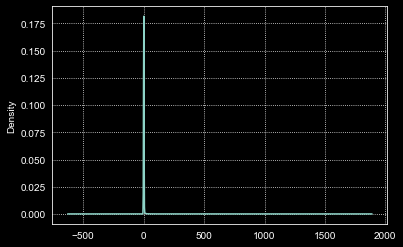

In [18]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [19]:
# Describe NAME central tendencies
name_counts.describe()

count    19568.000000
mean         1.752811
std         14.786174
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1260.000000
Name: NAME, dtype: float64

In [20]:
# Show how many names occur 1 - 25 times
for i in range(1,26):
    print(f'Occurences: {i},  Names:' + f'{len(name_counts[(name_counts == i)])}')

Occurences: 1,  Names:18776
Occurences: 2,  Names:215
Occurences: 3,  Names:103
Occurences: 4,  Names:72
Occurences: 5,  Names:48
Occurences: 6,  Names:39
Occurences: 7,  Names:31
Occurences: 8,  Names:30
Occurences: 9,  Names:32
Occurences: 10,  Names:18
Occurences: 11,  Names:10
Occurences: 12,  Names:11
Occurences: 13,  Names:15
Occurences: 14,  Names:8
Occurences: 15,  Names:11
Occurences: 16,  Names:6
Occurences: 17,  Names:8
Occurences: 18,  Names:5
Occurences: 19,  Names:9
Occurences: 20,  Names:3
Occurences: 21,  Names:7
Occurences: 22,  Names:6
Occurences: 23,  Names:7
Occurences: 24,  Names:3
Occurences: 25,  Names:2


<AxesSubplot:ylabel='Density'>

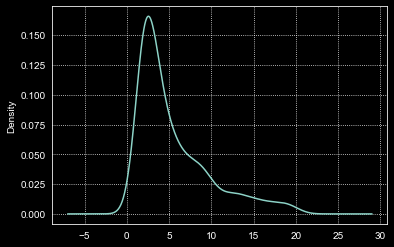

In [21]:
# Most names occur only once
# View density of names that occur 2 - 20 times
name_counts[(name_counts > 1) & (name_counts <= 20)].plot.density()

<AxesSubplot:ylabel='Density'>

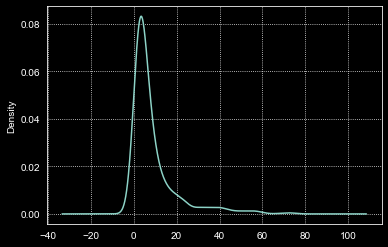

In [22]:
# View density of names that occur 2 - 75 times
name_counts[(name_counts > 1) & (name_counts <= 75)].plot.density()

<AxesSubplot:ylabel='Density'>

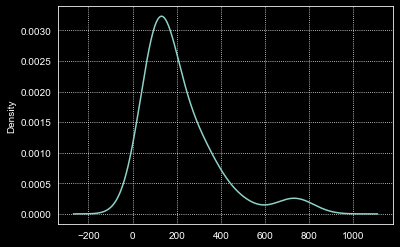

In [23]:
# View density of names that occur 75 - 1000 times
name_counts[(name_counts > 75) & (name_counts <= 1000)].plot.density()

In [24]:
# Bin one-time donors into single category
replace_1 = list(name_counts[name_counts == 1].index)

for app in replace_1:
    application_df['NAME'] = application_df['NAME'].replace(app, 'One-time donation')

application_df['NAME'].value_counts()

One-time donor                                                        18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [25]:
application_df.nunique()

NAME                 793
APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         9
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [26]:
# Check DataFrame data types
# Ask_amount is numerical and does not need categorization.
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


In [27]:
# Generate list of columns to be categorized
application_cat = application_df.dtypes[application_df.dtypes == "object"]\
    .index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat) 
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Save merged DataFrame
application_df.to_csv(f'./Data/applications_encoded_{nn_vers}.csv')

In [31]:
# Split the preprocessed data into features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile the Model

In [33]:
# Define number of input features and hidden nodes for each layer
inputs_len = len(X_train_scaled[0])

nn_layers = 3

# Decrease each number of nodes per layer by n_scale_l1 / nn_layers
n_scale_l1 = 2
n_scale_l2 = n_scale_l1 - (n_scale_l1 / nn_layers * 1)
n_scale_l3 = n_scale_l1 - (n_scale_l1 / nn_layers * 2)

nodes_l1 = round(inputs_len * n_scale_l1)
nodes_l2 = round(inputs_len * n_scale_l2)
nodes_l3 = round(inputs_len * n_scale_l3)

# Instantiate the deep neural net model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(
    units=nodes_l1,
    activation="relu",
    input_dim=inputs_len))

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=nodes_l2,
    activation="relu",
    input_dim=nodes_l1))

# Third hidden layer
nn.add(tf.keras.layers.Dense(
    units=nodes_l3,
    activation="relu",
    input_dim=nodes_l2))

# Output layer
nn.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1672)              1399464   
                                                                 
 dense_1 (Dense)             (None, 1115)              1865395   
                                                                 
 dense_2 (Dense)             (None, 557)               621612    
                                                                 
 dense_3 (Dense)             (None, 1)                 558       
                                                                 
Total params: 3,887,029
Trainable params: 3,887,029
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Create checkpoint
os.makedirs(f'Checkpoints/v{nn_vers}', exist_ok=True)
checkpoint_path = f'Checkpoints/v{nn_vers}/' +'weights.{epoch:02d}.hdf5'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [36]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4754 - accuracy: 0.7843
Epoch 2/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4191 - accuracy: 0.8045
Epoch 3/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4113 - accuracy: 0.8066
Epoch 4/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4107 - accuracy: 0.8075
Epoch 5/100
802/804 [============================>.] - ETA: 0s - loss: 0.4110 - accuracy: 0.8080
Epoch 5: saving model to Checkpoints/v3\weights.05.hdf5
804/804 [==============================] - 17s 21ms/step - loss: 0.4110 - accuracy: 0.8080
Epoch 6/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4074 - accuracy: 0.8087
Epoch 7/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4063 - accuracy: 0.8084
Epoch 8/100
804/804 [==============================] - 17s 21ms/step - loss: 0.4057 - accuracy: 0.8101
Epoch 9/100
804/804 [==============

### Evaluate Model for Loss and Accuracy

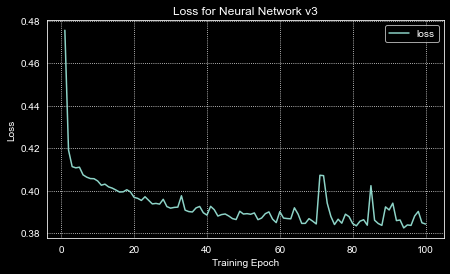

In [37]:
# Create DataFrame containing training history
history_df = pd.DataFrame(
    fit_model.history,
    index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(
    y='loss',
    xlabel='Training Epoch',
    ylabel='Loss',
    title=f'Loss for Neural Network v{nn_vers}',
    figsize=((16/9 * 4), 4)
    )

plt.savefig(f'Images/v{nn_vers}_loss.png')

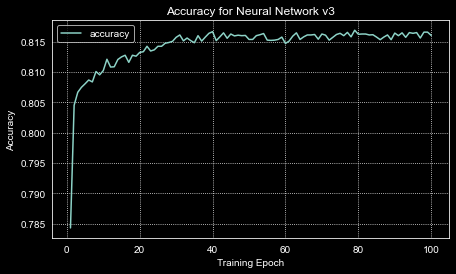

In [38]:
history_df.plot(
    y='accuracy',
    xlabel='Training Epoch',
    ylabel='Accuracy',
    title=f'Accuracy for Neural Network v{nn_vers}',
    figsize=((16/9 * 4), 4)
)

plt.savefig(f'Images/v{nn_vers}_accuracy.png')

In [39]:
# Evaluate the model using the test data
print(f'Neural Network Version {nn_vers} Test Evaluation')
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Neural Network Version 3 Test Evaluation
268/268 - 2s - loss: 0.6142 - accuracy: 0.7927 - 2s/epoch - 7ms/step
Loss: 0.6141854524612427, Accuracy: 0.7926530838012695


In [40]:
# Export model to HDF5 file
nn.save(f'Trained_Models/trained_model_{nn_vers}.h5')